In [1]:
# corrugator used the new electrodes
# zygomaticus used the old electrodes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.signal import butter, lfilter, iirnotch

# band pass filter 带通滤波
def bandpass_filter(x, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = lfilter(b, a, x)
    return filtered_data

# notch filter 带阻滤波（陷波滤波，滤去工频50Hz）
def notch_filter(x, notch_freq, Q, fs):
    nyquist = 0.5 * fs
    notch_freq_normalized = notch_freq / nyquist
    b, a = iirnotch(notch_freq_normalized, Q)
    filtered_data = lfilter(b, a, x)
    return filtered_data

In [4]:
data = pd.read_csv("999.txt", sep="\t", header=None)
data.columns = ["zyg","scr","cor"] + [f'trig_{i+1}' for i in range(8)] + ['na']

In [5]:
data

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na
0,0.137939,0.019836,0.081024,0,0,0,0,0,0,0,0,NaN
1,0.015717,0.021362,0.023498,0,0,0,0,0,0,0,0,NaN
2,-0.031128,0.019836,0.001221,0,0,0,0,0,0,0,0,NaN
3,-0.059509,0.019836,-0.025330,0,0,0,0,0,0,0,0,NaN
4,-0.096588,0.018311,-0.043335,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
563092,0.218811,0.015259,0.114441,0,0,0,0,0,0,0,0,NaN
563093,0.091248,0.018311,0.054169,0,0,0,0,0,0,0,0,NaN
563094,-0.007324,0.018311,0.009460,0,0,0,0,0,0,0,0,NaN
563095,-0.048675,0.016785,-0.008545,0,0,0,0,0,0,0,0,NaN


In [6]:
data['line'] = np.array(list(np.linspace(0, data.shape[0]-1, data.shape[0])), int)

In [7]:
data

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line
0,0.137939,0.019836,0.081024,0,0,0,0,0,0,0,0,NaN,0
1,0.015717,0.021362,0.023498,0,0,0,0,0,0,0,0,NaN,1
2,-0.031128,0.019836,0.001221,0,0,0,0,0,0,0,0,NaN,2
3,-0.059509,0.019836,-0.025330,0,0,0,0,0,0,0,0,NaN,3
4,-0.096588,0.018311,-0.043335,0,0,0,0,0,0,0,0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563092,0.218811,0.015259,0.114441,0,0,0,0,0,0,0,0,NaN,563092
563093,0.091248,0.018311,0.054169,0,0,0,0,0,0,0,0,NaN,563093
563094,-0.007324,0.018311,0.009460,0,0,0,0,0,0,0,0,NaN,563094
563095,-0.048675,0.016785,-0.008545,0,0,0,0,0,0,0,0,NaN,563095


In [8]:
data["binary"] = data.trig_1.astype(str) + data.trig_2.astype(str) + data.trig_3.astype(str) + \
data.trig_4.astype(str) + data.trig_5.astype(str) + data.trig_6.astype(str) + \
data.trig_7.astype(str) + data.trig_8.astype(str)
# data.binary.iloc[0] = '12345678'
# data.binary.iloc[0][::-1]
data

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line,binary
0,0.137939,0.019836,0.081024,0,0,0,0,0,0,0,0,NaN,0,00000000
1,0.015717,0.021362,0.023498,0,0,0,0,0,0,0,0,NaN,1,00000000
2,-0.031128,0.019836,0.001221,0,0,0,0,0,0,0,0,NaN,2,00000000
3,-0.059509,0.019836,-0.025330,0,0,0,0,0,0,0,0,NaN,3,00000000
4,-0.096588,0.018311,-0.043335,0,0,0,0,0,0,0,0,NaN,4,00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563092,0.218811,0.015259,0.114441,0,0,0,0,0,0,0,0,NaN,563092,00000000
563093,0.091248,0.018311,0.054169,0,0,0,0,0,0,0,0,NaN,563093,00000000
563094,-0.007324,0.018311,0.009460,0,0,0,0,0,0,0,0,NaN,563094,00000000
563095,-0.048675,0.016785,-0.008545,0,0,0,0,0,0,0,0,NaN,563095,00000000


In [9]:
data[data.binary != '00000000']

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line,binary
10542,0.076447,0.016785,0.034790,0,0,0,0,5,0,0,0,NaN,10542,00005000
10543,0.067902,0.019836,0.051727,0,0,0,0,5,0,0,0,NaN,10543,00005000
10544,0.074921,0.021362,0.053864,0,0,0,0,5,0,0,0,NaN,10544,00005000
10545,0.208130,0.016785,0.115509,0,0,0,0,5,0,0,0,NaN,10545,00005000
10546,0.191956,0.018311,0.106812,0,0,0,0,5,0,0,0,NaN,10546,00005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555899,-0.236359,0.013733,-0.118103,5,5,0,0,0,0,0,0,NaN,555899,55000000
555900,-0.083466,0.015259,-0.054169,5,5,0,0,0,0,0,0,NaN,555900,55000000
555901,0.015259,0.021362,-0.010376,5,5,0,0,0,0,0,0,NaN,555901,55000000
555902,0.038605,0.015259,0.010223,5,5,0,0,0,0,0,0,NaN,555902,55000000


In [10]:
triggers = pd.read_csv('DACFE_trigger.csv', header=0)
triggers["Binary"] = triggers["Binary"].astype(int) * 5
triggers["binary"] = triggers["Binary"].astype(str).str.zfill(8)

In [11]:
for i in range(triggers.shape[0]):
    triggers.loc[i,"binary"] = triggers.loc[i, "binary"][::-1]  # start, stop, stepsize = -1

In [10]:
# check trigger codeing

In [12]:
data = data.merge(triggers, on="binary").drop(["Binary"], axis=1)

In [13]:
data = data.sort_values(by='line')
data

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line,binary,TriggerName,Code
0,0.076447,0.016785,0.034790,0,0,0,0,5,0,0,0,NaN,10542,00005000,offlineT0Start,16
1,0.067902,0.019836,0.051727,0,0,0,0,5,0,0,0,NaN,10543,00005000,offlineT0Start,16
2,0.074921,0.021362,0.053864,0,0,0,0,5,0,0,0,NaN,10544,00005000,offlineT0Start,16
3,0.208130,0.016785,0.115509,0,0,0,0,5,0,0,0,NaN,10545,00005000,offlineT0Start,16
4,0.191956,0.018311,0.106812,0,0,0,0,5,0,0,0,NaN,10546,00005000,offlineT0Start,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,-0.236359,0.013733,-0.118103,5,5,0,0,0,0,0,0,NaN,555899,55000000,instructions,3
648,-0.083466,0.015259,-0.054169,5,5,0,0,0,0,0,0,NaN,555900,55000000,instructions,3
649,0.015259,0.021362,-0.010376,5,5,0,0,0,0,0,0,NaN,555901,55000000,instructions,3
650,0.038605,0.015259,0.010223,5,5,0,0,0,0,0,0,NaN,555902,55000000,instructions,3


In [14]:
# data[data.TriggerName == "expStart"]

In [15]:
# data[data.TriggerName == "offlineT0Start"]

In [16]:
# this program restarted
# exclude the first useless run
data = data[data.line > 10551].copy()

In [17]:
phase_names = list(triggers['TriggerName'][triggers['TriggerName'].str.endswith(("Start", "End"))])
phase_names

['expStart',
 'prac2BackStart',
 'caliStart',
 'prac1BackStart',
 'prac3BackStart',
 'pracMainStart',
 'testStart',
 'offlineT0Start',
 'learningStart',
 'offlineT1Start',
 'trueChoiceStart',
 'offlineT2Start',
 'learningCheckT1Start',
 'falseChoiceStart',
 'offlineT3Start',
 'learningCheckT2Start',
 'demandRatingStart',
 'expEnd',
 'trialStart',
 'seqEnd',
 'trialEnd']

In [18]:
data['Phase'] = ''
line_idxs = {}
for phase in phase_names:
    line_i = np.where(data['TriggerName']== phase)[0][0]
    line_n = data.line.iloc[line_i]
#     print(phase, line_i)
    line_idxs[phase]=line_n

line_idxs

{'expStart': 86992,
 'prac2BackStart': 93582,
 'caliStart': 108150,
 'prac1BackStart': 134552,
 'prac3BackStart': 177398,
 'pracMainStart': 221802,
 'testStart': 263414,
 'offlineT0Start': 263424,
 'learningStart': 291229,
 'offlineT1Start': 343189,
 'trueChoiceStart': 358788,
 'offlineT2Start': 413808,
 'learningCheckT1Start': 431261,
 'falseChoiceStart': 445431,
 'offlineT3Start': 501208,
 'learningCheckT2Start': 518335,
 'demandRatingStart': 530523,
 'expEnd': 555854,
 'trialStart': 224937,
 'seqEnd': 238595,
 'trialEnd': 241607}

In [19]:
# Practice Start
data.loc[data.line.isin(range(line_idxs['prac2BackStart'],line_idxs['caliStart'])),'Phase'] = "Practice2Back"
data.loc[data.line.isin(range(line_idxs['caliStart'],line_idxs['prac1BackStart'])),'Phase'] = "Calibration"
data.loc[data.line.isin(range(line_idxs['prac1BackStart'],line_idxs['prac3BackStart'])),'Phase'] = "Practice1Back"
data.loc[data.line.isin(range(line_idxs['prac3BackStart'],line_idxs['testStart'])),'Phase'] = "Practice3Back"
# Test Start
data.loc[data.line.isin(range(line_idxs['offlineT0Start'],line_idxs['learningStart'])),'Phase'] = "OfflineRatingT0"
data.loc[data.line.isin(range(line_idxs['learningStart'],line_idxs['offlineT1Start'])),'Phase'] = "Learning"
data.loc[data.line.isin(range(line_idxs['offlineT1Start'],line_idxs['trueChoiceStart'])),'Phase'] = "OfflineRatingT1"
data.loc[data.line.isin(range(line_idxs['trueChoiceStart'],line_idxs['offlineT2Start'])),'Phase'] = "TrueChoice"

data.loc[data.line.isin(range(line_idxs['offlineT2Start'],line_idxs['learningCheckT1Start'])),'Phase'] = "OfflineRatingT2"
data.loc[data.line.isin(range(line_idxs['learningCheckT1Start'],line_idxs['falseChoiceStart'])),'Phase'] = "LearningCheckT1"
data.loc[data.line.isin(range(line_idxs['falseChoiceStart'],line_idxs['offlineT3Start'])),'Phase'] = "FalseChoice"
data.loc[data.line.isin(range(line_idxs['offlineT3Start'],line_idxs['learningCheckT2Start'])),'Phase'] = "OfflineRatingT3"
data.loc[data.line.isin(range(line_idxs['learningCheckT2Start'],line_idxs['demandRatingStart'])),'Phase'] = "LearningCheckT2"
# Demand Manipulation Check
data.loc[data.line.isin(range(line_idxs['demandRatingStart'],line_idxs['expEnd'])),'Phase'] = "DemandRating"

# seperate datasets

## Leanring Phase

In [139]:
data_learning = data[data['Phase'] == "Learning"].copy().sort_values('line')
# data_learning

In [140]:
trial_n = []
trial_count = 0
        
for i in range(data_learning.shape[0]):
    if data_learning['TriggerName'].iloc[i] == "trialStart":
        if data_learning['TriggerName'].iloc[i+1] != "trialStart":
            trial_count += 1
    if data_learning['TriggerName'].iloc[i] == "trialEnd":
        pass
    trial_n.append(trial_count)

data_learning['Trial_N'] = trial_n
data_learning

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line,binary,TriggerName,Code,Phase,Trial_N
202198,-0.094452,0.019836,-0.041809,5,5,5,5,5,0,0,0,NaN,291229,55555000,learningStart,31,Learning,0
202199,-0.075226,0.015259,-0.050507,5,5,5,5,5,0,0,0,NaN,291230,55555000,learningStart,31,Learning,0
202200,-0.071869,0.019836,-0.053101,5,5,5,5,5,0,0,0,NaN,291231,55555000,learningStart,31,Learning,0
202201,-0.231171,0.019836,-0.114441,5,5,5,5,5,0,0,0,NaN,291232,55555000,learningStart,31,Learning,0
202202,-0.182190,0.018311,-0.104675,5,5,5,5,5,0,0,0,NaN,291233,55555000,learningStart,31,Learning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165246,-0.000763,0.018311,-0.016174,5,0,0,5,5,5,0,0,NaN,341689,50055500,trialEnd,57,Learning,3
165247,0.026245,0.019836,0.008087,5,0,0,5,5,5,0,0,NaN,341690,50055500,trialEnd,57,Learning,3
165248,0.057221,0.015259,0.020294,5,0,0,5,5,5,0,0,NaN,341691,50055500,trialEnd,57,Learning,3
165249,0.082550,0.019836,0.035858,5,0,0,5,5,5,0,0,NaN,341692,50055500,trialEnd,57,Learning,3


### cues

In [22]:
# data_learning.to_csv("data_learning_trials.csv")

In [148]:
# select columns
cls = ["zyg","scr","cor","Trial_N", "TriggerName"]
# select triggers
trs = ["fixaCue", "cueEasy", "cueHard"]
df_learning_cues = data_learning.loc[data_learning.TriggerName.isin(trs),cls]
df_learning_cues

,zyg,scr,cor,Trial_N,TriggerName
139704,-0.017090,0.018311,0.003052,1,fixaCue
139705,-0.044861,0.019836,-0.012360,1,fixaCue
139706,-0.068817,0.015259,-0.029602,1,fixaCue
139707,-0.085907,0.019836,-0.039978,1,fixaCue
139708,-0.070801,0.018311,-0.051117,1,fixaCue
...,...,...,...,...,...
151653,-0.030365,0.018311,0.001526,3,cueEasy
151654,-0.058136,0.019836,-0.013428,3,cueEasy
151655,-0.088501,0.016785,-0.047760,3,cueEasy
151656,-0.073090,0.016785,-0.051575,3,cueEasy


In [167]:
# 3 trials
Time = []

for i in range(1, 4):
    fs = 1_000
    length = df_learning_cues.loc[df_learning_cues['Trial_N']==i].shape[0]
    lines = np.linspace(0, length+1, length)
    time = (lines / fs)*100
    Time += list(time)
df_learning_cues['Time']=Time
# data_learning_cues[data_learning_cues['Trial_N']==3]

In [168]:
channels = ['cor','zyg','scr']

for c in channels:
    # cor signal
    signal = df_learning_cues[c]
    # 1. Bandpass filter
    signal_bp = bandpass_filter(signal, 20, 450, fs)
    # 2. Rectify the signal
    signal_r = np.abs(signal_bp)
    # 3. Notch filter @ 50Hz
    signal_n50 = notch_filter(signal_r, 50, 10, fs)
    df_learning_cues[c+'_filtered'] = signal_n50

In [169]:
df_learning_cues

,zyg,scr,cor,Trial_N,TriggerName,cor_filtered,zyg_filtered,scr_filtered,Time
139704,-0.017090,0.018311,0.003052,1,fixaCue,0.001464,0.008199,0.008785,0.000000
139705,-0.044861,0.019836,-0.012360,1,fixaCue,0.004990,0.026305,0.014641,0.100067
139706,-0.068817,0.015259,-0.029602,1,fixaCue,0.019442,0.035197,0.001757,0.200133
139707,-0.085907,0.019836,-0.039978,1,fixaCue,0.020286,0.031150,-0.000496,0.300200
139708,-0.070801,0.018311,-0.051117,1,fixaCue,0.016546,0.008840,0.000606,0.400266
...,...,...,...,...,...,...,...,...,...
151653,-0.030365,0.018311,0.001526,3,cueEasy,0.081123,0.168205,0.001566,299.699733
151654,-0.058136,0.019836,-0.013428,3,cueEasy,0.070192,0.140366,0.000688,299.799800
151655,-0.088501,0.016785,-0.047760,3,cueEasy,0.081143,0.136913,0.001218,299.899867
151656,-0.073090,0.016785,-0.051575,3,cueEasy,0.067104,0.080048,0.002738,299.999933


In [138]:
# # 3 trials
# for i in range(1, 4):
#     df=data_learning_cues[data_learning_cues.Trial_N == i].groupby('TriggerName')
#     fig, ax = plt.subplots(figsize=(10,6))
#     for key, grouped in df:
#         x=grouped.Time
#         y=grouped.cor_filtered
#         ax.plot(x,y, alpha=0.8, label=key);
#         ax.set_xlabel("Time (ms)")
#         ax.set_ylabel("Corrugator Signal")
#         ax.legend()

## Offline Ratings

In [161]:
data_offlines = data[data['Phase'].str.startswith("OfflineRating")].copy().sort_values('line')
data_offlines['Timepoint'] = data_offlines['Phase'].str[-2:]

trial_n = []
trial_count = 0
        
for i in range(data_offlines.shape[0]):
    if data_offlines['TriggerName'].iloc[i] == "trialStart":
        if data_offlines['TriggerName'].iloc[i+1] != "trialStart":
            trial_count += 1
    if data_offlines['TriggerName'].iloc[i] == "trialEnd":
        pass
    trial_n.append(trial_count)

data_offlines['Trial_N'] = trial_n
data_offlines

data_offlines
# data_offlines

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line,binary,TriggerName,Code,Phase,Timepoint
10,0.057221,0.018311,0.045624,0,0,0,0,5,0,0,0,NaN,263424,00005000,offlineT0Start,16,OfflineRatingT0,T0
11,0.153046,0.016785,0.076904,0,0,0,0,5,0,0,0,NaN,263425,00005000,offlineT0Start,16,OfflineRatingT0,T0
12,0.225067,0.018311,0.119019,0,0,0,0,5,0,0,0,NaN,263426,00005000,offlineT0Start,16,OfflineRatingT0,T0
13,0.121765,0.018311,0.066528,0,0,0,0,5,0,0,0,NaN,263427,00005000,offlineT0Start,16,OfflineRatingT0,T0
14,-0.012817,0.019836,0.005646,0,0,0,0,5,0,0,0,NaN,263428,00005000,offlineT0Start,16,OfflineRatingT0,T0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202193,-0.189209,0.021362,-0.092163,5,5,5,0,0,0,5,5,NaN,515339,55500055,respHardOfflineRating,199,OfflineRatingT3,T3
202194,-0.073547,0.019836,-0.048828,5,5,5,0,0,0,5,5,NaN,515340,55500055,respHardOfflineRating,199,OfflineRatingT3,T3
202195,0.014954,0.016785,-0.007782,5,5,5,0,0,0,5,5,NaN,515341,55500055,respHardOfflineRating,199,OfflineRatingT3,T3
202196,0.046692,0.018311,0.010376,5,5,5,0,0,0,5,5,NaN,515342,55500055,respHardOfflineRating,199,OfflineRatingT3,T3


In [ ]:
data_offlines[data_offlines['TriggerName']]

In [175]:
# select columns
cls = ["zyg","scr","cor","Timepoint", "TriggerName"]
# select triggers
trs = ["fixaOfflineRating", "probEasyOfflineRating", "probHardOfflineRating"]
df_offline_cues = data_offlines.loc[data_offlines.TriggerName.isin(trs),cls]
df_offline_cues

,zyg,scr,cor,Timepoint,TriggerName
180360,0.081177,0.021362,0.043335,T0,fixaOfflineRating
180361,0.063629,0.019836,0.048218,T0,fixaOfflineRating
180362,0.077362,0.018311,0.051422,T0,fixaOfflineRating
180363,0.250092,0.018311,0.124054,T0,fixaOfflineRating
180364,0.170898,0.019836,0.096283,T0,fixaOfflineRating
...,...,...,...,...,...
202152,0.100098,0.016785,0.065002,T3,probHardOfflineRating
202153,0.187531,0.019836,0.096130,T3,probHardOfflineRating
202154,0.065918,0.019836,0.044708,T3,probHardOfflineRating
202155,-0.018158,0.018311,-0.000610,T3,probHardOfflineRating


In [176]:
# 3 trials
Time = []

for t in ['T0','T1','T2','T3']:
    fs = 1_000
    length = df_offline_cues.loc[df_offline_cues['Timepoint']==t].shape[0]
    lines = np.linspace(0, length+1, length)
    time = (lines / fs)*100
    Time += list(time)
df_offline_cues['Time']=Time

channels = ['cor','zyg','scr']

for c in channels:
    # cor signal
    signal = df_offline_cues[c]
    # 1. Bandpass filter
    signal_bp = bandpass_filter(signal, 20, 450, fs)
    # 2. Rectify the signal
    signal_r = np.abs(signal_bp)
    # 3. Notch filter @ 50Hz
    signal_n50 = notch_filter(signal_r, 50, 10, fs)
    df_offline_cues[c+'_filtered'] = signal_n50
df_offline_cues

,zyg,scr,cor,Timepoint,TriggerName,Time,cor_filtered,zyg_filtered,scr_filtered
180360,0.081177,0.021362,0.043335,T0,fixaOfflineRating,0.000000,0.020791,0.038947,0.010249
180361,0.063629,0.019836,0.048218,T0,fixaOfflineRating,0.100038,0.035260,0.053243,0.015495
180362,0.077362,0.018311,0.051422,T0,fixaOfflineRating,0.200075,0.011860,0.005649,0.001369
180363,0.250092,0.018311,0.124054,T0,fixaOfflineRating,0.300113,0.039333,0.093073,-0.000481
180364,0.170898,0.019836,0.096283,T0,fixaOfflineRating,0.400150,0.038966,0.088188,0.000489
...,...,...,...,...,...,...,...,...,...
202152,0.100098,0.016785,0.065002,T3,probHardOfflineRating,314.599746,0.032562,0.074888,0.000799
202153,0.187531,0.019836,0.096130,T3,probHardOfflineRating,314.699809,0.033630,0.071885,0.000819
202154,0.065918,0.019836,0.044708,T3,probHardOfflineRating,314.799873,0.041747,0.085140,0.001695
202155,-0.018158,0.018311,-0.000610,T3,probHardOfflineRating,314.899936,0.073752,0.149933,0.000008


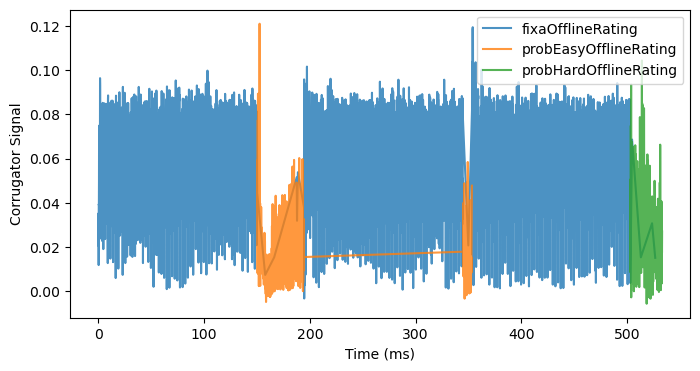

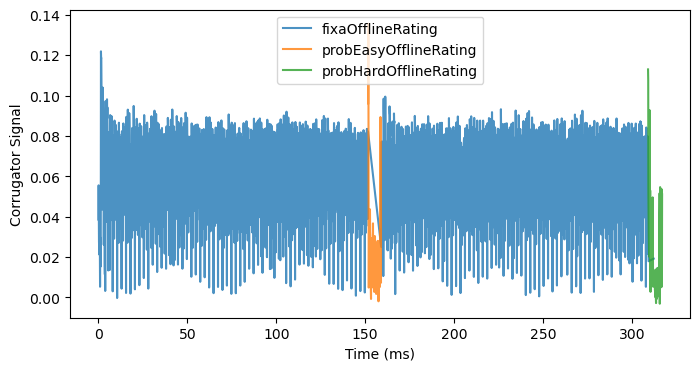

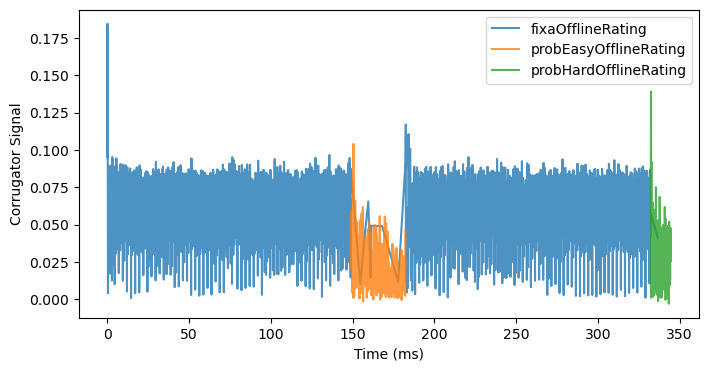

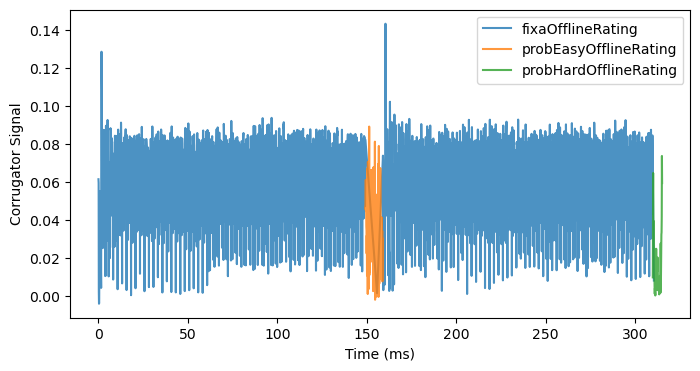

In [179]:
# 3 trials
for t in ['T0','T1','T2','T3']:
    df=df_offline_cues[df_offline_cues.Timepoint == t].groupby('TriggerName')
    fig, ax = plt.subplots(figsize=(8,4))
    for key, grouped in df:
        x=grouped.Time
        y=grouped.cor_filtered
        ax.plot(x,y, alpha=0.8, label=key);
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Corrugator Signal")
        ax.legend()

## True Choice Phase

# compute means

## Learning phase

### Cues

In [152]:
Trial_N = []
cor_values = []
zyg_values = []
scr_values = []

for i in range(1,4):
    df=df_learning_cues[df_learning_cues['Trial_N'] == i]
#     print(df)
    df_mean = df.groupby(['TriggerName']).agg({'cor':'mean','zyg':'mean','scr':'mean'})
    trial_n = i
    
    cor_cue_mean = df_mean.iloc[0,0]
    cor_base_mean = df_mean.iloc[1,0]
    cor_value = cor_cue_mean - cor_base_mean
    
    zyg_cue_mean = df_mean.iloc[0,1]
    zyg_base_mean = df_mean.iloc[1,1]
    zyg_value = zyg_cue_mean - zyg_base_mean
    
    scr_cue_mean = df_mean.iloc[0,2]
    scr_base_mean = df_mean.iloc[1,2]
    scr_value = scr_cue_mean - scr_base_mean
    
    Trial_N.append(i)
    cor_values.append(cor_value)
    zyg_values.append(zyg_value)
    scr_values.append(scr_value)
    
#     print("Trial",i, "Cor-Value:" ,cor_value)

combs = {'Trial_N':Trial_N, 'cor_values': cor_values,'zyg_values': zyg_values,'scr_values': scr_values}
means_learning_cues = pd.DataFrame(combs)
means_learning_cues

,Trial_N,cor_values,zyg_values,scr_values
0,1,-0.000071,-0.000249,0.000119
1,2,0.000229,0.000536,0.000061
2,3,0.000310,0.000524,0.000041


## Offline rating

In [ ]:
import matplotlib.pyplot as plt

groups = data_learning[data_learning.TriggerName.isin(["fixaCue","cueEasy","cueHard"])].groupby('TriggerName')


fig, ax = plt.subplots(figsize=(10,6))

for cue, group in groups:
    x = group.line
    cor = group.cor.values
    ax.plot(x,cor,label=cue)
ax.legend(loc='upper right')


In [390]:
data_true_choice = data[data['Phase'] == "TrueChoice"].copy()
data_true_choice

,zyg,scr,cor,trig_1,trig_2,trig_3,trig_4,trig_5,trig_6,trig_7,trig_8,na,line,binary,TriggerName,Code,Phase
264247,-0.070038,0.019836,-0.055695,5,5,5,5,5,5,0,0,NaN,587345,55555500,trueChoiceStart,63,TrueChoice
264248,-0.078735,0.021362,-0.048675,5,5,5,5,5,5,0,0,NaN,587346,55555500,trueChoiceStart,63,TrueChoice
264249,-0.205841,0.018311,-0.107422,5,5,5,5,5,5,0,0,NaN,587347,55555500,trueChoiceStart,63,TrueChoice
264250,-0.226746,0.019836,-0.121002,5,5,5,5,5,5,0,0,NaN,587348,55555500,trueChoiceStart,63,TrueChoice
264251,-0.092773,0.019836,-0.061951,5,5,5,5,5,5,0,0,NaN,587349,55555500,trueChoiceStart,63,TrueChoice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206383,-0.052948,0.021362,-0.052795,5,0,0,0,5,5,0,0,NaN,638100,50005500,trialEnd,49,TrueChoice
206384,0.020752,0.012207,-0.003815,5,0,0,0,5,5,0,0,NaN,638101,50005500,trialEnd,49,TrueChoice
206385,0.042114,0.019836,0.007324,5,0,0,0,5,5,0,0,NaN,638102,50005500,trialEnd,49,TrueChoice
206386,0.072022,0.018311,0.026550,5,0,0,0,5,5,0,0,NaN,638103,50005500,trialEnd,49,TrueChoice


In [347]:
import matplotlib.pyplot as plt

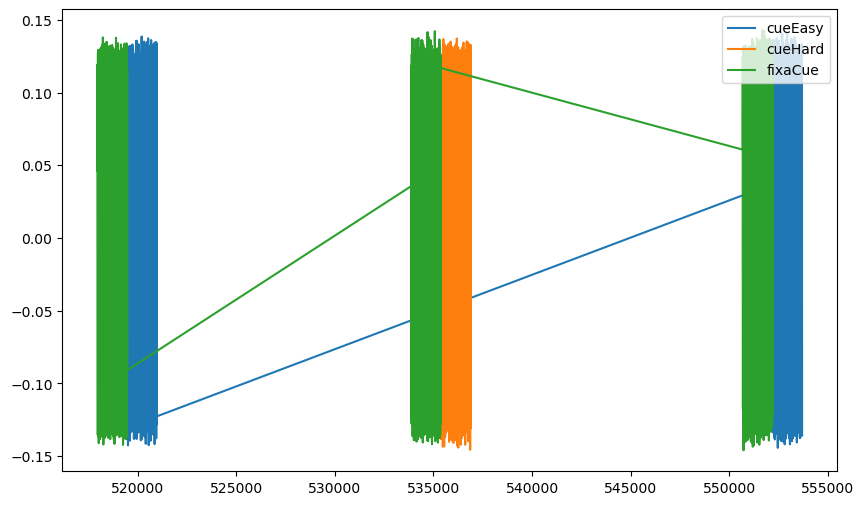

In [387]:
groups = data_learning[data_learning.TriggerName.isin(["fixaCue","cueEasy","cueHard"])].groupby('TriggerName')


fig, ax = plt.subplots(figsize=(10,6))

for cue, group in groups:
    x = group.line
    cor = group.cor.values
    ax.plot(x,cor,label=cue)
ax.legend(loc='upper right')


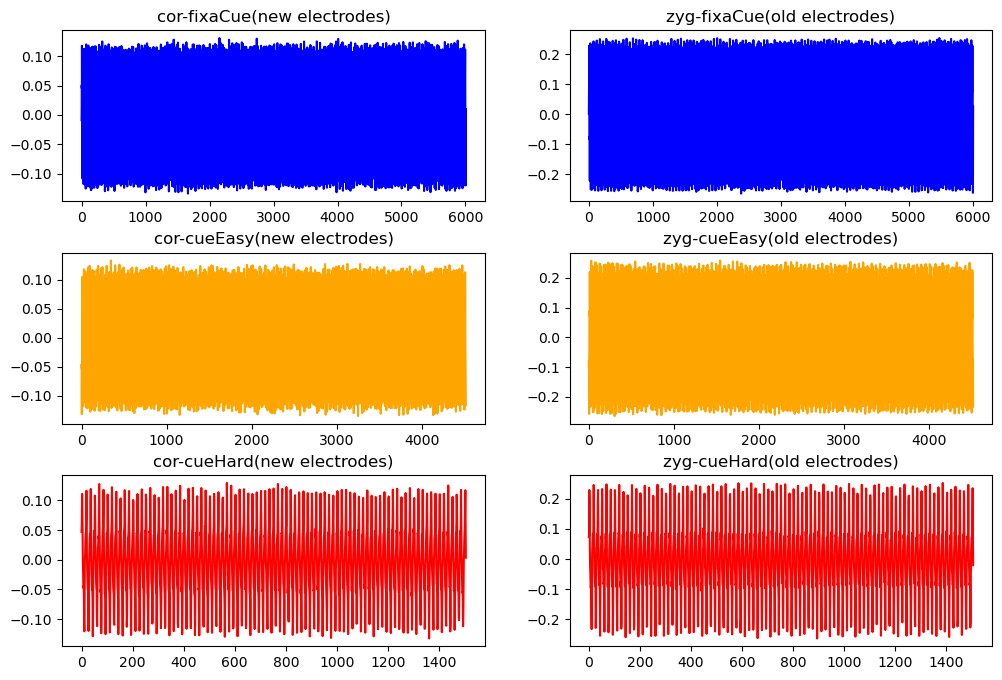

In [31]:
foc_triggers = ["fixaCue","cueEasy","cueHard"]
foc_chans = ["cor","zyg"]
elcs = ["(new electrodes)","(old electrodes)"]
colors = ["blue","orange","red"]
fig, axs = plt.subplots(len(foc_triggers),len(foc_chans),figsize=(12,8))

for i in range(len(foc_triggers)):
    for j in range(len(foc_chans)):
        filtered_data = data[data['TriggerName'] == foc_triggers[i]]
        axs[i,j].plot(filtered_data[foc_chans[j]].values,color=colors[i])
        axs[i,j].set_title(foc_chans[j]+'-'+foc_triggers[i]+elcs[j])
plt.subplots_adjust(hspace=0.3)

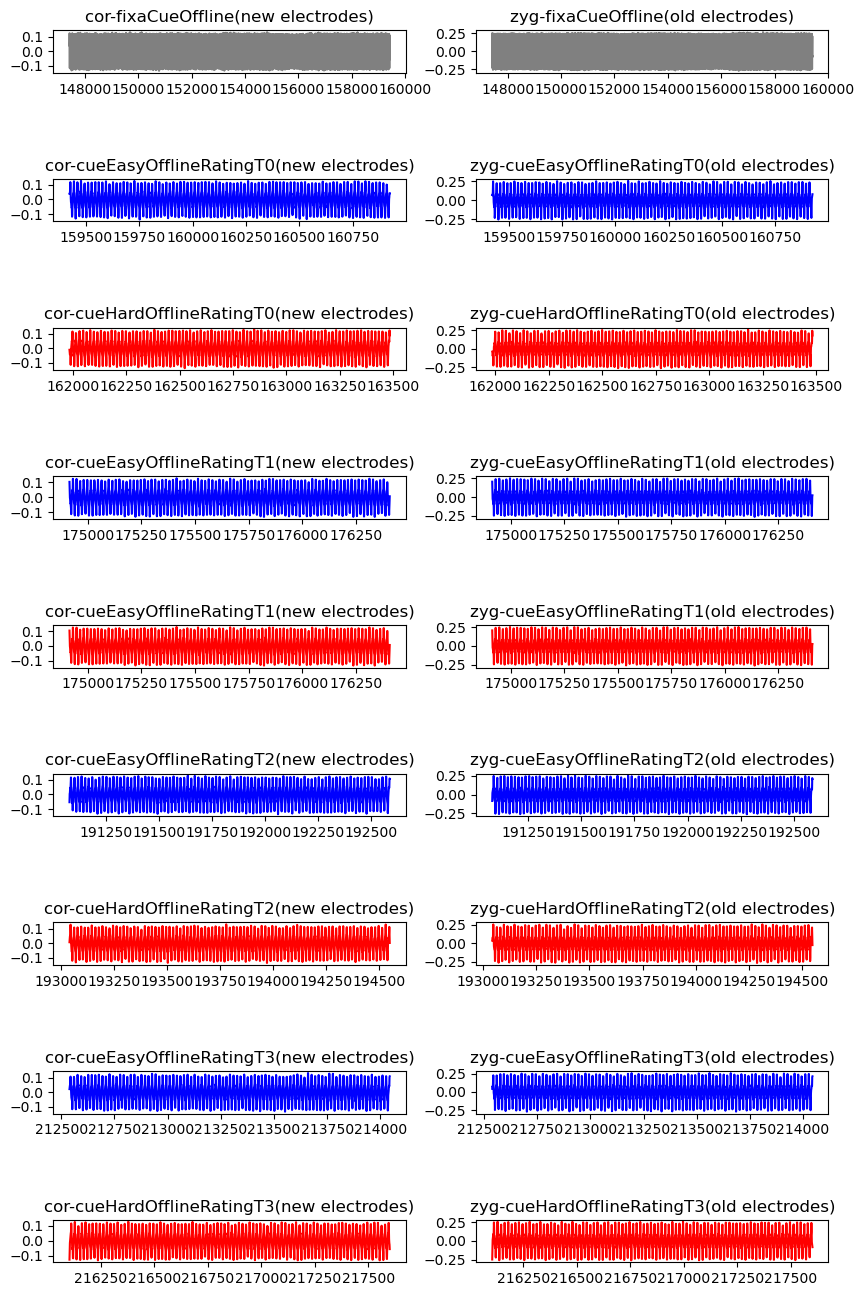

In [123]:
foc_triggers = ["fixaCueOffline",
                "cueEasyOfflineRatingT0","cueHardOfflineRatingT0",
                "cueEasyOfflineRatingT1","cueEasyOfflineRatingT1",
               "cueEasyOfflineRatingT2","cueHardOfflineRatingT2",
               "cueEasyOfflineRatingT3","cueHardOfflineRatingT3"]
foc_chans = ["cor","zyg"]
elcs = ["(new electrodes)","(old electrodes)"]
colors = ["grey","blue","red","blue","red","blue","red","blue","red",
          "green","orange","green","orange","green","orange","green","orange"]
fig, axs = plt.subplots(len(foc_triggers),len(foc_chans),figsize=(10,16))

for i in range(len(foc_triggers)):
    for j in range(len(foc_chans)):
        filtered_data = data[data['TriggerName'] == foc_triggers[i]]
        axs[i,j].plot(filtered_data[foc_chans[j]],color=colors[i])
        axs[i,j].set_title(foc_chans[j]+'-'+foc_triggers[i]+elcs[j])
plt.subplots_adjust(hspace=2.5)

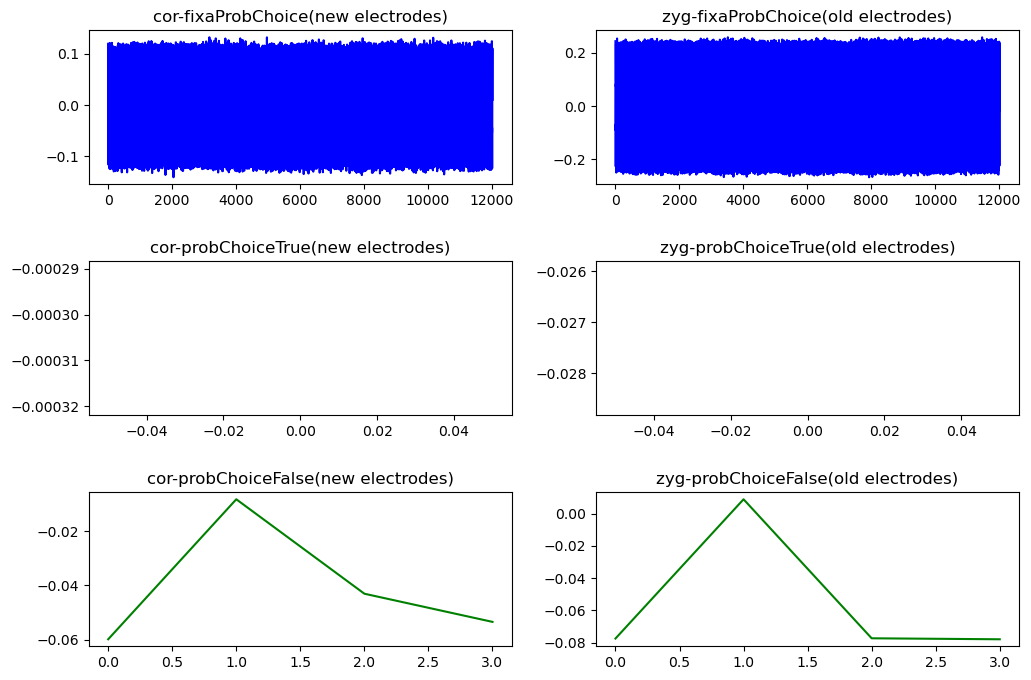

In [30]:
foc_triggers = ["fixaProbChoice","probChoiceTrue","probChoiceFalse"]
foc_chans = ["cor","zyg"]
elcs = ["(new electrodes)","(old electrodes)"]
colors = ["blue","orange","green"]
fig, axs = plt.subplots(len(foc_triggers),len(foc_chans),figsize=(12,8))

for i in range(len(foc_triggers)):
    for j in range(len(foc_chans)):
        filtered_data = data[data['TriggerName'] == foc_triggers[i]]
        axs[i,j].plot(filtered_data[foc_chans[j]].values,color=colors[i])
        axs[i,j].set_title(foc_chans[j]+'-'+foc_triggers[i]+elcs[j])
plt.subplots_adjust(hspace=0.5)

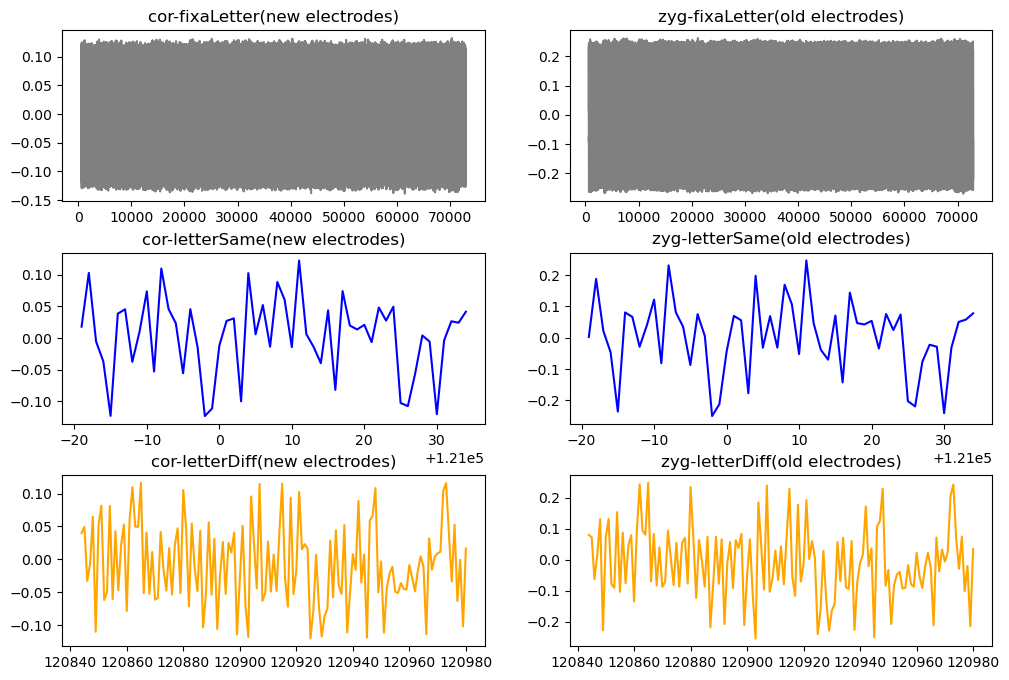

In [124]:
foc_triggers = ["fixaLetter","letterSame","letterDiff"]
foc_chans = ["cor","zyg"]
elcs = ["(new electrodes)","(old electrodes)"]
colors = ["grey","blue","orange"]
fig, axs = plt.subplots(len(foc_triggers),len(foc_chans),figsize=(12,8))

for i in range(len(foc_triggers)):
    for j in range(len(foc_chans)):
        filtered_data = data[data['TriggerName'] == foc_triggers[i]]
        axs[i,j].plot(filtered_data[foc_chans[j]],color=colors[i])
        axs[i,j].set_title(foc_chans[j]+'-'+foc_triggers[i]+elcs[j])
plt.subplots_adjust(hspace=0.3)

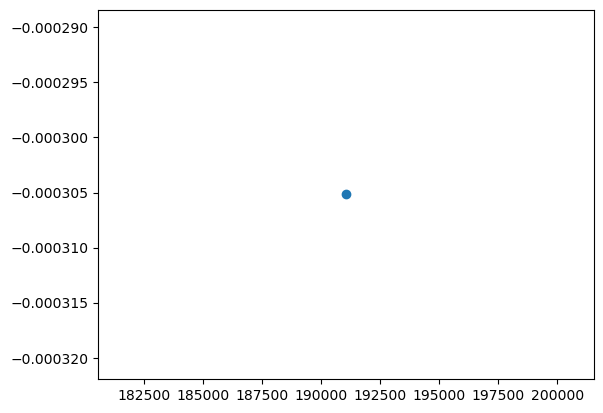

In [122]:
plt.plot(data[data['TriggerName'] == "probChoiceTrue"]['cor'], marker='o')

In [99]:
a = set(dict(data["TriggerName"].value_counts(dropna=False)).keys())
# a
b = set(dict(triggers["TriggerName"].value_counts()))
# b

In [100]:
a.difference(b)

set()

In [101]:
b.difference(a)

{'respChoiceFalseEasy', 'respChoiceFalseHard', 'respChoiceTimeout'}

In [82]:
trigger_counts = data["TriggerName"].value_counts()
# type(trigger_counts)
trigger_counts.to_csv("trigger_counts.csv")

In [67]:
# data[data.TriggerName == "cueEasy"]

In [41]:
# select data lines (epoch)

In [ ]:
SAMPLING_RATE = 1_000
n_lines = data.shape[0]
cue_dura = 3_000
# signal_scr_chan = 2
# signal_a_chan = 1
# signal_b_chan = 3
# trigger_chan = np.arange(3,11)

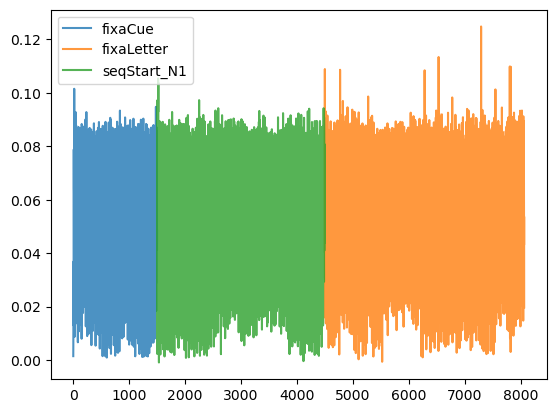

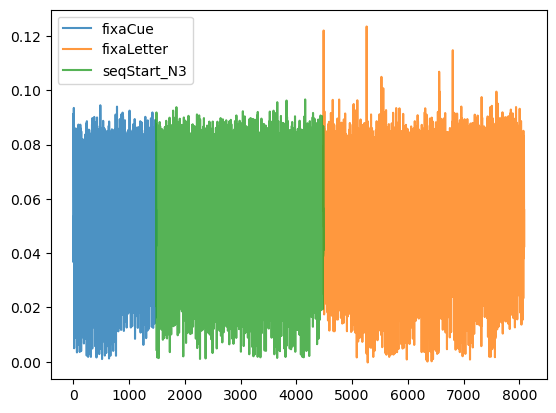

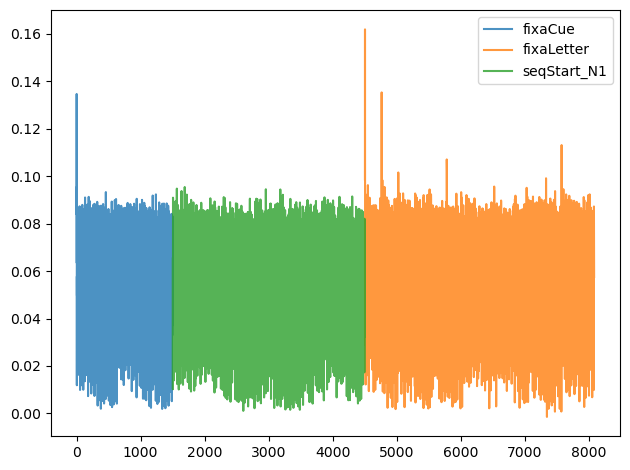